In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [79]:
df = pd.read_csv(r'E:\Projects\ChurnPrediction\TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
df.drop(columns=['customerID'],inplace=True)
df.shape

(7043, 20)

In [82]:
df.describe(percentiles=[0.01, 0.05, 0.1, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.0,1.00,2.00,9.0,29.00,55.00,69.0,72.0,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,19.65,20.05,35.5,70.35,89.85,102.6,107.4,114.729,118.75


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

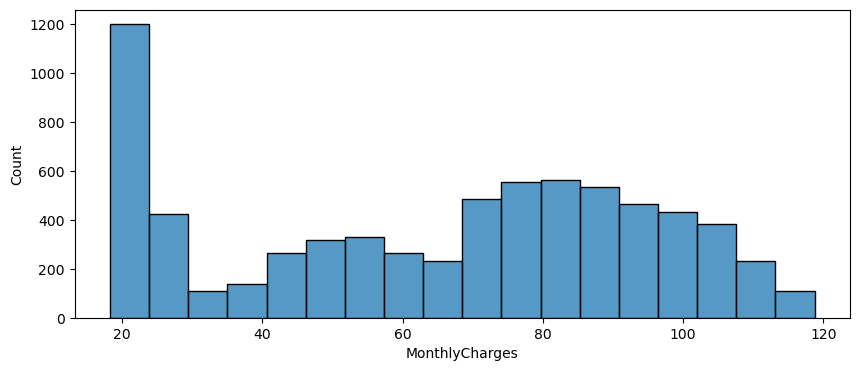

In [83]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='MonthlyCharges')

In [84]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [85]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].nunique())


Column: gender
2

Column: Partner
2

Column: Dependents
2

Column: PhoneService
2

Column: MultipleLines
3

Column: InternetService
3

Column: OnlineSecurity
3

Column: OnlineBackup
3

Column: DeviceProtection
3

Column: TechSupport
3

Column: StreamingTV
3

Column: StreamingMovies
3

Column: Contract
3

Column: PaperlessBilling
2

Column: PaymentMethod
4

Column: TotalCharges
6531

Column: Churn
2


In [86]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [88]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [89]:
df.dropna( inplace=True)

In [90]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [91]:
df.shape

(7032, 20)

In [92]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df, title='EDA Report', explorative=True, orange_mode= False, minimal=False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
y = df['Churn']
lable_enc = LabelEncoder()
y = lable_enc.fit_transform(y)

In [94]:
y.shape

(7032,)

In [95]:
X = df.drop(columns=['Churn'])
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_fit = pd.get_dummies(X[categorical_cols], drop_first=True, dtype=int)
numeric_block = X[['tenure','MonthlyCharges','TotalCharges']] 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(numeric_block),
                        columns=numeric_block.columns,
                        index=numeric_block.index)
X_final = pd.concat([X_fit, X_scaled, X['SeniorCitizen']], axis=1)


In [96]:
# for col in X_fit.columns:
#     try:
#         X_final[col] = X_final[col].astype('int')
#     except:
#         pass

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=13, stratify=y)   # stratify keeps the churn ratio same in train and test


In [98]:
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=13)

In [22]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
y_proba

array([0.86740804, 0.02402968, 0.81772197, ..., 0.04074732, 0.82650652,
       0.46966771])

In [23]:
confusion_matrix(y_test, y_pred)

array([[774, 259],
       [ 65, 309]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9225    0.7493    0.8269      1033
           1     0.5440    0.8262    0.6561       374

    accuracy                         0.7697      1407
   macro avg     0.7333    0.7877    0.7415      1407
weighted avg     0.8219    0.7697    0.7815      1407



Text(0, 0.5, 'True Positive Rate')

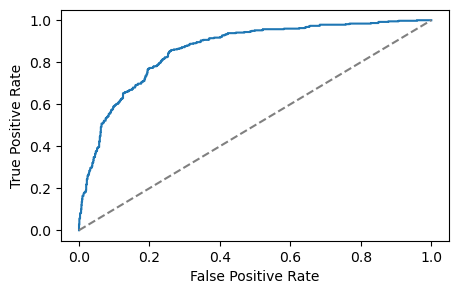

In [25]:
fpr, tpr, th = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr, label=f'LogReg (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [34]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'class_weight': ['balanced']
}

lr1 = LogisticRegression(max_iter=2000, random_state=13)

In [35]:
grid_search = GridSearchCV(lr1, param_grid, cv= 5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Manish Malik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Manish Malik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Manish Malik\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Manish Malik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", lin

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000, random_state=13),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             scoring='roc_auc', verbose=1)

In [36]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
Best CV AUC: 0.8411452217642342


In [37]:
best_lr = grid_search.best_estimator_
y_pred1 = best_lr.predict(X_test)
y_proba1 = best_lr.predict_proba(X_test)[:,1]


In [38]:
roc_auc_score(y_test, y_proba1)

0.8603840638605175

In [39]:
print(classification_report(y_test, y_pred1, digits=2))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1033
           1       0.54      0.83      0.66       374

    accuracy                           0.77      1407
   macro avg       0.73      0.79      0.74      1407
weighted avg       0.82      0.77      0.78      1407



Text(0, 0.5, 'True Positive Rate')

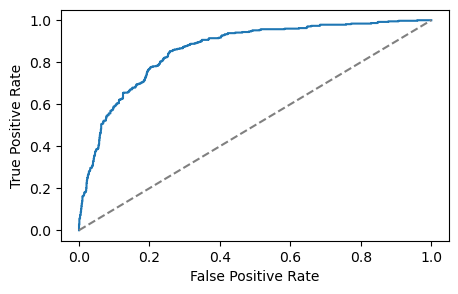

In [40]:
fpr, tpr, th = roc_curve(y_test, y_proba1)
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr, label=f'LogReg (AUC = {roc_auc_score(y_test, y_proba1):.4f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Random Forest


In [110]:
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=2, min_samples_split=5, class_weight='balanced', random_state=13, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, n_jobs=-1,
                       random_state=13)

In [111]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, -1]


In [112]:
roc_auc_score(y_test, y_pred_rf)

0.7513860776203467

In [113]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1033
           1       0.63      0.64      0.63       374

    accuracy                           0.81      1407
   macro avg       0.75      0.75      0.75      1407
weighted avg       0.81      0.81      0.81      1407



In [114]:
print(f"Train Accuracy: {rf.score(X_train, y_train)}")

Train Accuracy: 0.9384888888888889


In [115]:
print(f"Train Accuracy: {rf.score(X_test, y_test)}")

Train Accuracy: 0.8052594171997157


In [47]:
rf.feature_importances_

array([0.02080185, 0.0184857 , 0.01641223, 0.0043971 , 0.00417333,
       0.01522115, 0.06085646, 0.01079903, 0.00722926, 0.02717717,
       0.01091746, 0.01748478, 0.01088079, 0.01525036, 0.00679084,
       0.02304199, 0.00864675, 0.01406605, 0.01010552, 0.01443717,
       0.03306994, 0.07399983, 0.02265362, 0.01295603, 0.04810209,
       0.01075194, 0.17471097, 0.12784009, 0.16497771, 0.0137628 ])

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}
rf1 = RandomForestClassifier(class_weight='balanced', random_state=13, n_jobs=-1)

In [60]:
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 300, 500, 800]},
             scoring='precision')

In [61]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [62]:
grid_search.best_score_

0.6346783370131571

In [63]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_proba_best)

0.8416390141377329

In [64]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.50      0.58       374

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [54]:
y_pred_train = best_rf.predict(X_train)

In [57]:
best_rf.score(X_train, y_train)

0.7491555555555556

In [58]:
best_rf.score(X_test, y_test)

0.7640369580668088

In [107]:
rf.fit(X_train, y_train)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)
feat_imp

tenure                                   0.174711
TotalCharges                             0.164978
MonthlyCharges                           0.127840
Contract_Two year                        0.074000
InternetService_Fiber optic              0.060856
PaymentMethod_Electronic check           0.048102
Contract_One year                        0.033070
OnlineSecurity_Yes                       0.027177
TechSupport_Yes                          0.023042
PaperlessBilling_Yes                     0.022654
gender_Male                              0.020802
Partner_Yes                              0.018486
OnlineBackup_Yes                         0.017485
Dependents_Yes                           0.016412
DeviceProtection_Yes                     0.015250
MultipleLines_Yes                        0.015221
StreamingMovies_Yes                      0.014437
StreamingTV_Yes                          0.014066
SeniorCitizen                            0.013763
PaymentMethod_Credit card (automatic)    0.012956


In [108]:
low_imp_features = feat_imp[feat_imp < 0.01].index
X_train.drop(columns=low_imp_features, inplace = True)
X_test.drop(columns=low_imp_features, inplace = True)
rf.fit(X_train, y_train)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)
feat_imp

tenure                                   0.184711
TotalCharges                             0.170252
MonthlyCharges                           0.142562
Contract_Two year                        0.072449
InternetService_Fiber optic              0.063169
PaymentMethod_Electronic check           0.038113
Contract_One year                        0.031266
OnlineSecurity_Yes                       0.024613
PaperlessBilling_Yes                     0.023023
TechSupport_Yes                          0.022039
gender_Male                              0.021202
OnlineBackup_Yes                         0.018298
Partner_Yes                              0.018103
InternetService_No                       0.017215
Dependents_Yes                           0.016283
MultipleLines_Yes                        0.015905
DeviceProtection_No internet service     0.015276
DeviceProtection_Yes                     0.014545
StreamingMovies_Yes                      0.014332
StreamingTV_Yes                          0.014233


In [116]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.8506181052021266

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1033
           1       0.63      0.65      0.64       374

    accuracy                           0.81      1407
   macro avg       0.75      0.76      0.75      1407
weighted avg       0.81      0.81      0.81      1407



In [75]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}
rf1 = RandomForestClassifier(class_weight='balanced', random_state=13, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 300, 500, 800]},
             scoring='precision')

In [76]:
grid_search.best_score_

0.6336579005530171

In [77]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [78]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



XGBoost

In [1]:
# baseline XGboost model